In [18]:
%matplotlib inline

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [1095]:
def distance(point1, point2):
    return math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)

In [1096]:
# Задаване на координатната система
def create_field(figsize = (7,7), x_lim = (-20, 20), y_lim= (-20, 20)):
    plt.figure(figsize =figsize)  

    ax = plt.gca()
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['top'].set_visible(False)   
    
    ax.spines['right'].set_visible(False)
    ax.set_aspect('equal')
    plt.axis('equal')
    
    plt.xlim(*x_lim)
    plt.ylim(*y_lim)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    
    # Преместване на лейбълите на осите отстрани 
    ax.xaxis.set_label_coords(1.05, 0.5)
    ax.yaxis.set_label_coords(0.5, 1.05) 
    
    plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)

In [1097]:
def create_line(a,b, x_lim):
    x = np.linspace(*x_lim,500)
    y = a*x + b
    return x, y

In [1098]:
def create_spiral(r_incr_velocity = 1, angle_velocity=1, init_angle=0):
    
    max_spiral_vector_length = np.sqrt(2* 20 ** 2)
    max_t = max_spiral_vector_length / r_incr_velocity
    lin_space = (0, max_t)
    
    T = np.linspace(*lin_space, 2000)
    
    x = [r_incr_velocity * time * np.cos(init_angle + time * angle_velocity) for time in T]
    y = [r_incr_velocity * time * np.sin(init_angle + time * angle_velocity) for time in T]
    
    return x, y

In [1099]:
# def get_spiral_vec_coords(spiral_vec_magnitude,spiral_vec_velocity, angle_velocity, init_angle=0):
#     # Т e времето за което спиралният вектор е достигнал съответната големина.
#     # Чрез него ще намерим съответстващият ъгъл на завъртане на спиралата за тази големина на вектора
#     T = spiral_vec_magnitude / spiral_vec_velocity
#     spiral_angle = init_angle + T * angle_velocity
    
#     x = spiral_vec_magnitude * np.cos(spiral_angle)
#     y = spiral_vec_magnitude * np.sin(spiral_angle)
    
#     # Връща началните координати на вектора - 0,0 - и крайните координати - x,y
#     return 0, 0, x, y
    

In [1100]:
def get_line_vector_magnitude(x, a, b):
    y = a*x + b
    vec_magnitude = distance((0, 0), (x, y))
    
    return vec_magnitude

In [1101]:
def get_angle(slope, degrees = False):
    if slope == 'inf':
        if degrees:
            return 90
        return np.pi/2
    if degrees:
        return np.arctan(slope) * 180/np.pi
    return np.arctan(slope)

In [1102]:
# Calculates the minimum distance between the linear function and the center of the spiral.
def get_little_radius_vec(slope, constant):
    if slope == 'inf' or slope == 0:
        return constant

    # The value of the x at y = 0
    x = -constant/slope
    angle = get_angle(slope)
    
 
    return abs(x * np.cos(np.pi/2 - abs(angle))), angle 

In [1103]:
def get_streched_unit_vector(x_length, s):
    return np.sqrt(x_length ** 2 + s **2)

In [1104]:
def get_y_intersection_points(spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle, y_lim):
    y_intersection_points = []

    if init_spiral_angle >= 2*np.pi:
        while init_spiral_angle >= 2*np.pi:
            init_spiral_angle-=2*np.pi

    
    start_angle = 0

    if np.pi/2 <=  init_spiral_angle < 3*np.pi/2:

        angle_diff = 3*np.pi /2 - init_spiral_angle
        start_angle = 3*np.pi /2
    elif init_spiral_angle >= 3*np.pi/2:

        angle_diff = np.pi /2 + (2 * np.pi  - init_spiral_angle)
        start_angle = np.pi /2
    elif 0<=init_spiral_angle<np.pi/2:

        angle_diff = np.pi/2 - init_spiral_angle
        start_angle = np.pi /2
        
    t = angle_diff / spiral_angle_velocity
    spiral_radius_magnitude = t * spiral_radius_velocity
    y_intersection_points.append([0, spiral_radius_magnitude * np.sin(start_angle)])

    if spiral_radius_magnitude< np.mean([abs(y_lim[0]), abs(y_lim[1])]):

        while spiral_radius_magnitude< np.mean([abs(y_lim[0]), abs(y_lim[1])]):
       
            start_angle += np.pi
            t = np.pi / spiral_angle_velocity
            spiral_radius_magnitude += t * spiral_radius_velocity
            y_intersection_points.append([0, spiral_radius_magnitude * np.sin(start_angle)])

      
    return y_intersection_points

In [1320]:
def calc_angles_sequence_limit(b, input_spiral_vector, spiral_radius_velocity, 
                                    init_spiral_angle, spiral_angle_velocity, min_distance):
       
        init_spiral_x = input_spiral_vector * np.cos(input_spiral_vector/ spiral_radius_velocity* spiral_angle_velocity)
        init_spiral_y = input_spiral_vector * np.sin(input_spiral_vector/ spiral_radius_velocity * spiral_angle_velocity)

        original_const_vector_length = np.copy(input_spiral_vector)


        const_vector_angle = init_spiral_angle + (original_const_vector_length / spiral_radius_velocity) * spiral_angle_velocity

        while True:
      
            last_spiral_vector = np.copy(input_spiral_vector)
            delta_angle = np.arctan(min_distance/input_spiral_vector)
            # print('Delta angle: ', delta_angle*180/np.pi)
            
            if delta_angle <= np.pi/2:

                length_to_add = delta_angle / spiral_angle_velocity * spiral_radius_velocity

                if b > 0:
                    if init_spiral_y <0:
                        delta_angle *= -1
                        length_to_add *= -1
                elif b <0:
                    if init_spiral_y > 0:
                        delta_angle *= -1
                        length_to_add *= -1


                curr_vector_angle = const_vector_angle - delta_angle

                input_spiral_vector = original_const_vector_length - length_to_add

                rotate_t = (curr_vector_angle/ spiral_angle_velocity)    

                new_x = input_spiral_vector * np.cos(rotate_t * spiral_angle_velocity)
                new_y = input_spiral_vector * np.sin(rotate_t * spiral_angle_velocity)

                new_spiral_vec_len = get_streched_unit_vector(new_x, new_y)


                input_spiral_vector = new_spiral_vec_len * np.cos(delta_angle)


                if input_spiral_vector == last_spiral_vector:
                    if new_spiral_vec_len >= min_distance:
                        return new_x, new_y
                    return 0, 0
            else:
                return 0, 0

In [1342]:
y_lim = (-20, 20)
a = -2.89
b = 34.36
spiral_radius_velocity = 1
init_spiral_angle = np.pi/2
spiral_angle_velocity = 1
y_intersects= get_y_intersection_points(spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle, y_lim)

In [1397]:
x_distance = 11.235659884324395
input_spiral_vector = y_intersects[6][1]
print(input_spiral_vector)
def calc_vertical_line_intersects(x_distance, input_spiral_vector_len, spiral_radius_velocity, 
                                    init_spiral_angle, spiral_angle_velocity):
    
    original_const_vector_length = np.copy(input_spiral_vector_len)
    
    print('input_spiral_vector_len: ', input_spiral_vector_len)
    print('Input spiral vec time: ', abs(input_spiral_vector_len/spiral_radius_velocity) )
    # init_angle = np.pi/2 if x_distance >0 else 3 * np.pi/ 2
    
    init_angle =init_spiral_angle+  abs(input_spiral_vector_len) / spiral_radius_velocity*spiral_angle_velocity
    print('Init angle :', init_angle * 180/np.pi)
    delta_angle = np.arctan(x_distance/input_spiral_vector_len)
    print('delta_angle: ', delta_angle, 'Correct angle: ', (init_angle - delta_angle) * 180/ np.pi)
    input_vec_copy = np.copy(input_spiral_vector_len)
    while True:
        
        last_spiral_vector = np.copy(abs(input_spiral_vector_len))
        if x_distance <0:
            
            if input_vec_copy <0:
   
                delta_angle = np.arctan(x_distance/input_spiral_vector_len)
                curr_angle = init_angle - delta_angle
                length_to_add = delta_angle / spiral_angle_velocity * spiral_radius_velocity
                new_spiral_vector_len = abs(original_const_vector_length) - length_to_add
                rotate_t = curr_angle/spiral_angle_velocity


                new_x = new_spiral_vector_len * np.cos(curr_angle)
                new_y = new_spiral_vector_len * np.sin(curr_angle)
                
                new_spiral_vector_len = get_streched_unit_vector(new_x, new_y)
                
                input_spiral_vector_len = -new_spiral_vector_len*np.cos(delta_angle)
                
                if abs(input_spiral_vector_len) == last_spiral_vector:
                    if new_spiral_vector_len >= abs(x_distance):
                        print(new_x, new_y)
                        break
calc_vertical_line_intersects(-x_distance, input_spiral_vector, spiral_radius_velocity, 
                                    init_spiral_angle, spiral_angle_velocity)

-21.991148575128552
input_spiral_vector_len:  -21.991148575128552
Input spiral vec time:  21.991148575128552
Init angle : 1349.9999999999998
delta_angle:  0.47234331446482036 Correct angle:  1322.9367215999453
-11.235659884324445 -18.259616144115913


In [1359]:
def rotate_y_intersection_points(a, b, y_intersects,angle, init_spiral_angle, spiral_radius_velocity, spiral_angle_velocity, min_distance):
        
        updated_y_intersection_points = []
        
        real_intersection_points = []
        
        angle_diff = angle - np.pi/2
        t = angle_diff / spiral_angle_velocity
        

        
        for point in y_intersects:
            
            spiral_radius_magnitude = abs(point[1]) + t * spiral_radius_velocity
            new_t = spiral_radius_magnitude / spiral_radius_velocity
            curr_angle = init_spiral_angle + new_t * spiral_angle_velocity
            
            x = spiral_radius_magnitude * np.cos(curr_angle)
            y = spiral_radius_magnitude * np.sin(curr_angle)
        
            
            updated_y_intersection_points.append([x, y])
     
            index = y_intersects.index(point)
        
            spiral_vec_length = get_streched_unit_vector(x, y)

                
            new_x, new_y = calc_angles_sequence_limit(b, spiral_vec_length, spiral_radius_velocity, 
                                init_spiral_angle, spiral_angle_velocity, min_distance)

            plt.scatter(new_x, new_y, color= 'purple', s = 20)

            spiral_vec_length = get_streched_unit_vector(new_x, new_y)
            # real_intersection_points.append([new_x, new_y])

   
            real_intersection_points.append([0, 0])
                
        return updated_y_intersection_points, real_intersection_points
    

In [1398]:
def plot_objects(a, b, x, spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle):

    y = a * x + b
    
    line_vec_magnitude = get_line_vector_magnitude(x, a, b)
    
    spiral_vec_magnitude = line_vec_magnitude
    
    min_distance, angle_to_line = get_little_radius_vec(a, b)
    print('Min distance: ', min_distance)

    create_field(figsize, x_lim, y_lim)
    
    x_line, y_line = create_line(a, b, (-20, 20))
    
    x_help_line, y_help_line = create_line(a, 0, (-20, 20))
    
    x_spiral, y_spiral = create_spiral(r_incr_velocity = spiral_radius_velocity, 
                                       init_angle = init_spiral_angle,
                                       angle_velocity = spiral_angle_velocity,
                                       )
 
    spiral_vec_coords = get_spiral_vec_coords(spiral_vec_magnitude, 
                                              spiral_radius_velocity,
                                              spiral_angle_velocity,
                                              init_spiral_angle)
    
    distance_between_vectors = distance((x, y), (spiral_vec_coords[2], spiral_vec_coords[3]))

    # Plot linear function
    plt.plot(x_line, y_line, color='blue', linewidth=1, linestyle='-')
    
    # Help line
    plt.plot(x_help_line, y_help_line, color='green', linewidth=1, linestyle='-')
    
    if b >0:
        angle_to_line += np.pi/2
    elif b <0:
        angle_to_line -= np.pi/2
        
    # Min distance from center to line
    plt.quiver(0,0,min_distance * np.cos(angle_to_line), min_distance * np.sin(angle_to_line),
               scale_units = "xy", scale = 1, linewidth = 0.01, color = 'black')

    
    
    
    # Plot spiral
    plt.plot(x_spiral, y_spiral, color = 'red', linewidth = 1, linestyle = '-')
    
    y_intersects = get_y_intersection_points(spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle, y_lim)
    
    line_angle = get_angle(a, degrees= False) + np.pi
  
    for points in y_intersects:
        plt.scatter(points[0], points[1], color= 'black', s = 20)
        
    updated_y_intersection_points, real_intersection_points = rotate_y_intersection_points(a,b, y_intersects,line_angle, init_spiral_angle,
                                                                 spiral_radius_velocity, spiral_angle_velocity, min_distance)
         
    for i in range(len(updated_y_intersection_points)):
        y_point = updated_y_intersection_points[i]
        y_real_point = real_intersection_points
        plt.scatter(y_point[0], y_point[1], color= 'green', s = 20)
        plt.scatter(y_real_point[0], y_real_point[1], color= 'purple', s = 20)
        
        
    # Plot left vertical line with x = -min_distance
    plt.axvline(-min_distance, 0,1, color='black', linestyle='-', linewidth=1)
    
    
    plt.scatter(-11.235659884324425, -9.709666458823545, color= 'y', s = 20)
    
    plt.scatter(-11.235659884324445, -18.259616144115913, color= 'y', s = 20)
    
    # left_v_line_intersects, right_v_line_itersects = [], []
    
    # Calculations for left vertical line`s intersecion points
#     for point in y_intersects:
#         left_x, left_y = calc_angles_sequence_limit(b, point[1], spiral_radius_velocity, 
#                                 init_spiral_angle, spiral_angle_velocity, -min_distance)
#         plt.scatter(left_x, left_y, color= 'orange', s = 20)
    
#     # Plot right vertical line with x = min_distance
#     plt.axvline(min_distance, 0,1, color='black', linestyle='-', linewidth=1)
    
    
                                                                 
    plt.show()

Min distance:  11.235659884324395


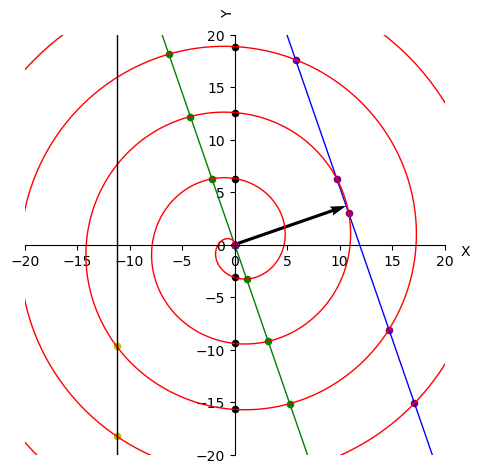

In [1399]:
# Define line and spiral variables
a = -2.89
b = 34.36
x = 1

spiral_radius_velocity = 1
init_spiral_angle = np.pi/2
spiral_angle_velocity = 1

plot_objects(a, b, x,spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle)
# plot_vectors_distances(a, b, spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle, x_range)

Init H:  -0.8 Init angle:  -0.9272952180016123
Spiral vec H:  -0.8579902034800204 Spiral angle:  1.2870022175865685
Ratio H`s:  0.93241157854156 Ratio angles:  -0.7205078634134047


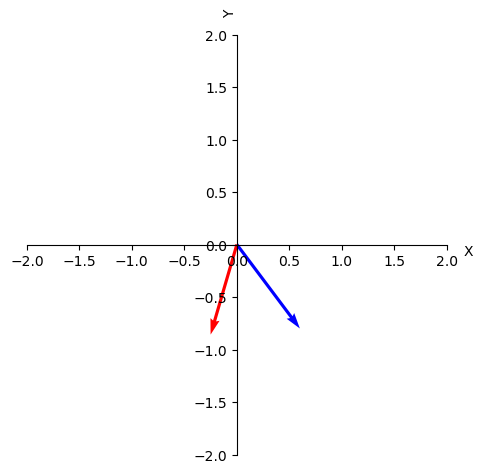

In [1040]:

create_field(figsize, (-2,2), (-2,2))
unit_vector_length = 1

vec_velocity = 0.002
angle_velocity = np.pi/2/90

h = -0.8
init_angle = np.arcsin(h)

t = init_angle / angle_velocity

new_vector_length = unit_vector_length + t * vec_velocity

init_vec_coords = [unit_vector_length * np.cos(init_angle), unit_vector_length * np.sin(init_angle)]

new_vec_coords = [new_vector_length * np.cos(init_angle + t*angle_velocity), new_vector_length * np.sin(init_angle+t*angle_velocity)]

plt.quiver(0, 0, *init_vec_coords, angles = "xy", scale_units = "xy", scale = 1, linewidth = 0.01, color = 'blue', alpha =1)
plt.quiver(0, 0, *new_vec_coords, angles = "xy", scale_units = "xy", scale = 1, linewidth = 0.01, color = 'red', alpha = 1)


print('Init H: ', h, 'Init angle: ',init_angle)

print('Spiral vec H: ', new_vec_coords[1], 'Spiral angle: ', np.arctan(new_vec_coords[1]/new_vec_coords[0]))

print('Ratio H`s: ',h / new_vec_coords[1],'Ratio angles: ',init_angle / np.arctan(new_vec_coords[1]/new_vec_coords[0]) )

plt.show()

new_spiral_vec_length:  1.09
From 45 if [0.7707463914933369, 0.7707463914933369]


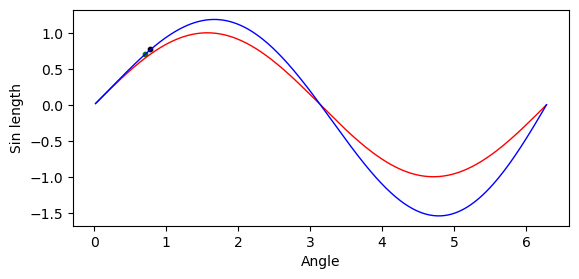

Sin Constant:  [0.01745329 1.002     ]


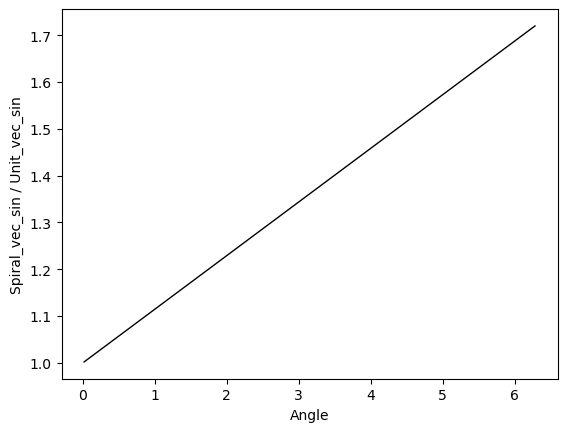

In [18]:
def get_sinuses_and_cosinuses(vec_velocity, angle_velocity, init_angle, curr_angle,unit_angle_diff):
    t = curr_angle / angle_velocity
    spiral_vec_length =1+ t * vec_velocity
    
    new_spiral_coords = []
    
    unit_vec_sin = np.sin(init_angle + curr_angle)
    spiral_vec_y = spiral_vec_length * np.sin(init_angle + t*angle_velocity)
    spiral_vec_x = spiral_vec_length * np.cos(init_angle + t*angle_velocity)
    
    spiral_slope = spiral_vec_y/spiral_vec_x
    # spiral_vec_angle = get_angle(np.tan(spiral_vec_y/spiral_vec_x))
    spiral_vec_angle = np.arctan(spiral_slope)
    
    # print('Ratio between : ', np.arctan(spiral_vec_y/unit_vec_sin)/curr_angle)
    
    # print('Spiral vector slope: ', np.tan(spiral_vec_y/spiral_vec_x), 'Spiral vec angle: ', spiral_vec_angle)
    
    if curr_angle / unit_angle_diff == 45:


        angle_diff = spiral_vec_angle - curr_angle
        
        t_diff = abs(angle_diff / angle_velocity)
        
        new_t = t - t_diff
        new_spiral_vec_length =1+ new_t * vec_velocity
        print('new_spiral_vec_length: ', new_spiral_vec_length)
        new_angle = curr_angle -  angle_diff
        
        new_spiral_x = new_spiral_vec_length*np.cos(init_angle + new_t * angle_velocity)
        new_spiral_y = new_spiral_vec_length * np.sin(init_angle + new_t * angle_velocity)
        print('From 45 if', [new_spiral_x, new_spiral_y])
        new_spiral_coords = [new_spiral_x, new_spiral_y]
        
    
    return unit_vec_sin, spiral_vec_y, new_spiral_coords

unit_angle_diff = np.pi/2/90
sinuses = []
sinuses_ratios = []
cosinuses_ratios = []
new_vec_coords = []
for degree in range(1,361):
    curr_angle = degree * unit_angle_diff
    unit_vec_sin, spiral_vec_sin, correction_vec = get_sinuses_and_cosinuses(vec_velocity, angle_velocity, 0,
                                                                             curr_angle,unit_angle_diff)
    
        
    sinuses.append([curr_angle, unit_vec_sin, spiral_vec_sin])
    
    sinuses_ratios.append([curr_angle, spiral_vec_sin/unit_vec_sin] )
    new_vec_coords.append(correction_vec)
sinuses = np.array(sinuses)
sinuses_ratios = np.array(sinuses_ratios)


new_vec_coords = [x for x in new_vec_coords if len(x) != 0 ][0]


ax = plt.gca()
ax.set_aspect('equal')
plt.plot(sinuses[:,0], sinuses[:,1],color = 'red', linewidth = 1, linestyle = '-')
plt.plot(sinuses[:,0], sinuses[:,2],color = 'blue', linewidth = 1, linestyle = '-')
plt.scatter(new_vec_coords[0], new_vec_coords[1], s= 10, color = 'black')
plt.scatter(np.cos(np.pi/4), np.sin(np.pi/4), color = 'green', s = 10)
plt.xlabel('Angle')
plt.ylabel('Sin length')
plt.show()
print('Sin Constant: ', sinuses_ratios[0])

plt.plot(sinuses_ratios[:,0], sinuses_ratios[:,1],color = 'black', linewidth = 1, linestyle = '-')
plt.xlabel('Angle')
plt.ylabel('Spiral_vec_sin / Unit_vec_sin')
ax.set_aspect('equal')
plt.show()

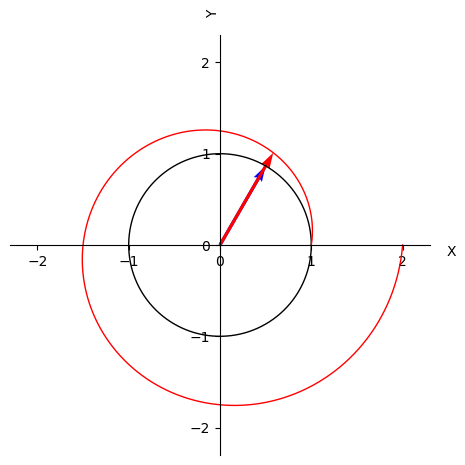

In [19]:
create_field(figsize, (-2.3,2.3), (-2.3,2.3))

angles = np.linspace(0, 2 * np.pi, 500)
x_circle = np.cos(angles)
y_circle = np.sin(angles)

angle_velocity = 1/(2* np.pi)
spiral_velocity = 2 / (2*np.pi)
unit_vector_length = 1
h = 0.3 * unit_vector_length
unit_vector_angle = np.arcsin(h)

theta = np.pi/3

# x_spiral =(1+ angles/spiral_velocity) * np.cos((angles/spiral_velocity)*angle_velocity)
# y_spiral = (1+angles/spiral_velocity) * np.sin((angles/spiral_velocity)*angle_velocity)
x_spiral = np.cos(angles)+(angles*angle_velocity) * np.cos(angles)
y_spiral = np.sin(angles)+(angles*angle_velocity) * np.sin(angles)



plt.plot(x_circle, y_circle, color = 'black', linewidth = 1, linestyle = '-')
plt.plot(x_spiral, y_spiral, color = 'red', linewidth = 1, linestyle = '-')

plt.quiver(0, 0, np.cos(theta), np.sin(theta), angles = "xy", scale_units = "xy", 
           scale = 1, linewidth = 0.01, color = 'blue', alpha =1)

plt.quiver(0, 0, np.cos(theta)+(theta*angle_velocity) * np.cos(theta),
           np.sin(theta) +(theta*angle_velocity) * np.sin(theta),
           angles = "xy", scale_units = "xy", scale = 1, linewidth = 0.01, color = 'red', alpha =1)

plt.show()


In [150]:
def calc_new_x_y_and_angle(x_length,unit_vec, spiral_vector_velocity, angle_velocity, s):
    new_angle = np.arctan(x_length)  
  
    curr_y = np.sin(new_angle)
    
    term = (new_angle/angle_velocity) * spiral_vector_velocity
    
    addition_x =np.cos(new_angle)*(term + 1)
    addition_y = np.sin(new_angle)*(term + 1)
    # print('Towa e addition')
    # print(addition_x, addition_y)
    
    new_x =  addition_x
    new_y =  addition_y
    
    
    
    streched_vector = get_streched_unit_vector(x_length, s)
    addition_vec_length = np.sqrt(addition_x ** 2 + addition_y **2)
    # print('Streched: ', streched_vector)
    # print('Addition: ', addition_vec_length)

    vectors_diff = abs(new_y- s)
    # print('new_y s: ',new_y,s )
    # print('vectors_diff: ', vectors_diff)
    
    true_x = x_length + vectors_diff
    
    
    
    return new_x, new_y, new_angle, curr_y,addition_vec_length, true_x, streched_vector,vectors_diff
    

In [415]:
def increase_x_y(x,y, angle_velocity):
    angle = np.arctan(y/x)
    spiral_y = np.sin(angle)+(angle*angle_velocity) * np.sin(angle)
    spiral_x = np.cos(angle)+(angle*angle_velocity) * np.cos(angle)
    
    diff_x = abs(x - spiral_x)
    diff_y = abs(y- spiral_y)

    return spiral_x, y +get_streched_unit_vector(diff_x,diff_y)

theta_angle/v_angle*v_spiral:  3.429852185550081
New x  0.4146082488325576
Theta angle:  65.50535152858033 New angle: 
s:  0.91
Theta_angle:  1.143284061850027 x_for_next_cos:  0.4146082488325576
Init x point:  0.35
49 -> 1.150977896978337


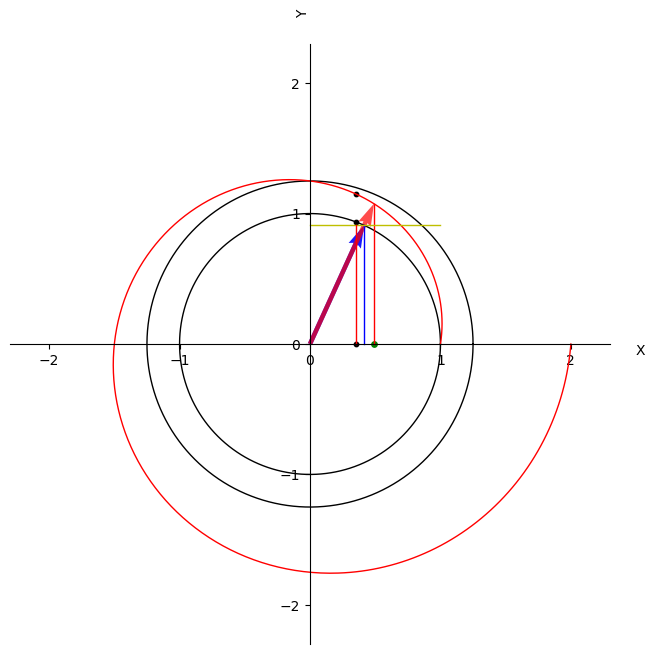

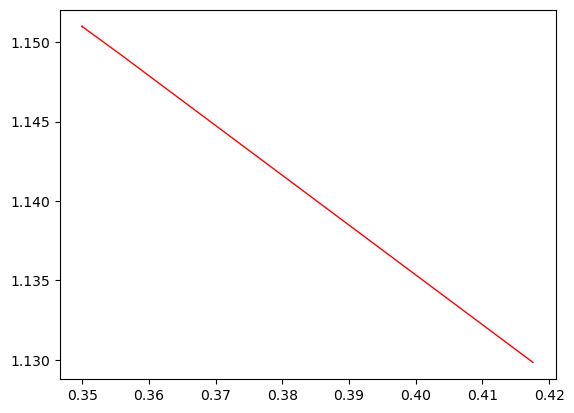

In [417]:
create_field((10,10), (-2.3,2.3), (-2.3,2.3))
x_circle = np.cos(angles)
y_circle = np.sin(angles)



angles = np.linspace(0, 2 * np.pi, 500)
unit_vec = 1
s = 0.91* unit_vec
v_angle = 1/(2* np.pi)
v_spiral = 3/(2*np.pi)
theta_angle = np.arcsin(s)
# S = s + (theta_angle / v_angle) * v_spiral * np.sin(theta_angle)


print('theta_angle/v_angle*v_spiral: ', theta_angle/v_angle*v_spiral)

# x_spiral =(unit_vec+ (angles/v_angle)*v_spiral) * np.cos((angles/v_angle)*v_angle)
# y_spiral = (unit_vec+ (angles/v_angle)*v_spiral) * np.sin((angles/v_angle)*v_angle)

x_spiral = np.cos(angles)+(angles*v_angle) * np.cos(angles)
y_spiral = np.sin(angles)+(angles*v_angle) * np.sin(angles)

new_x = np.cos(np.arcsin(s))
print('New x ', new_x)

# linspace_for_s = np.linspace(s, 0, 200)

# x_y_angles = []

# for s_lin in linspace_for_s:

#     new_x, new_y, new_angle, curr_y, addition_vec_length,_ ,_,_= calc_new_x_y_and_angle(s, unit_vec,v_spiral, v_angle, s_lin)
#     x_y_angles.append([new_x, new_y, new_angle, curr_y,addition_vec_length])
    # plt.scatter(new_x, 0,color = 'gray', s = 8)
    # plt.scatter(0,new_y,color = 'gray', s = 8)
    # print(new_y/addition_vec_length)
    
    
    
    

print('Theta angle: ', theta_angle* 180/np.pi, 'New angle: ')
   
    
    
    
    
    
# Plot black cicles
plt.plot(x_circle, y_circle, color = 'black', linewidth = 1, linestyle = '-')
plt.plot(1.25 * x_circle, 1.25 * y_circle,color = 'black', linewidth = 1, linestyle = '-')
plt.plot(x_spiral, y_spiral, color = 'red', linewidth = 1, linestyle = '-')

#Plot blue vertical line
plt.plot([np.cos(theta_angle),np.cos(theta_angle)], [0,np.sin(theta_angle) ],color = 'blue', linewidth = 1, linestyle = '-')

#Plot red vertical line
plt.plot([np.cos(theta_angle)+(theta_angle*v_angle) * np.cos(theta_angle),
         np.cos(theta_angle)+(theta_angle*v_angle) * np.cos(theta_angle)], 
         
         [0, np.sin(theta_angle) +(theta_angle*angle_velocity) * np.sin(theta_angle)],
         color = 'red', linewidth = 1, linestyle = '-')

plt.plot([0,1], [np.sin(theta_angle),np.sin(theta_angle)], color='y', linewidth = 1, linestyle = '-' )


# Green dot
plt.scatter(np.cos(theta_angle)+(theta_angle*angle_velocity)* np.cos(theta_angle), 0, color = 'green', s = 15)

# unit vector
plt.quiver(0, 0, np.cos(theta_angle), np.sin(theta_angle), angles = "xy", scale_units = "xy", 
           scale = 1, linewidth = 0.01, color = 'blue', alpha =0.9)

# spiral vector
plt.quiver(0, 0,np.cos(theta_angle) + (theta_angle*v_angle) * np.cos(theta_angle),
           np.sin(theta_angle) + (theta_angle*v_angle) * np.sin(theta_angle),
           angles = "xy", scale_units = "xy", scale = 1, linewidth = 0.01, color = 'red', alpha =0.7)



# # new_spiral_vector
# plt.quiver(0, 0, x_y_angles[0][0], x_y_angles[0][1], angles = "xy",
#            scale_units = "xy", scale = 1, linewidth = 0.01, color = 'green', alpha =0.7)
print('s: ', s)
x_for_next_cos = np.cos(np.arcsin(s))
print('Theta_angle: ', theta_angle, 'x_for_next_cos: ', x_for_next_cos)







new_xes_math_sequence = []

for i in range(10):
    first_point_x, _, new_angle,_,addition_vec_length, true_x, \
    streched_vector_length, vectors_diff = calc_new_x_y_and_angle(x_for_next_cos, unit_vec,v_spiral, v_angle,s)
    # print(x_for_next_cos, '->', true_x, 'Vectors diff: ', vectors_diff, 'Addition_vector_len: ', addition_vec_length)
    # print('New angle: ', new_angle)
    
    # plt.plot([true_x, true_x], [0, s], color = 'red', linewidth = 1, linestyle = '-')
        
    # streched_angle = np.arccos(true_x/streched_vector_length)
    # streched_y = streched_vector_length * np.sin(streched_angle)
    new_xes_math_sequence.append(x_for_next_cos)
    # plt.scatter(x_for_next_cos, s, color = 'black', s = 10)
    
#     plt.quiver(0, 0, x_for_next_cos, s, angles = "xy", scale_units = "xy", 
#            scale = 1, linewidth = 0.01, color = 'y', alpha =0.7)
    x_for_next_cos = true_x
assimptote = max(new_xes_math_sequence)

# plt.quiver(0, 0, assimptote, s, angles = "xy", scale_units = "xy", 
#            scale = 1, linewidth = 0.01, color = 'orange', alpha =0.7)

x_point = 0.35
print('Init x point: ', x_point)

plt.scatter(x_point, 0, color = 'black', s = 10)
# plt.scatter(x_point,np.sqrt(1 - x_point**2) * 1.25, color = 'black', s = 10)

plt.plot([x_point,x_point], [0, s],linewidth = 1, linestyle = '-', color='red' )
plt.scatter(x_point, np.sqrt(1 - x_point**2), color = 'black', s = 10)


y_base = np.sqrt(1 - x_point**2)

count_iter = 50

x_y_list = []

for i in range(count_iter):
    if i == count_iter-1:
        print(i, '->', y_base)
        plt.scatter(x_point,new_y, color = 'black', s = 10)
       
    new_x, new_y = increase_x_y(x_point,y_base, v_angle)
    # print('Tan new_y/(new_x - x)', new_y/(new_x - x_point))
    x_y_list.append([new_x, new_y])
    # print('New x: ', new_x, 'New y: ', new_y, 'Tangens y/x: ', new_y/ new_x)
    y_base = new_y

plt.show()
# create_field((10,10), (-1.3,1.3), (-1.3,1.3))
# x_y_angles = np.array(x_y_angles)
# # plt.plot(x_y_angles[:,3], x_y_angles[:,1],linewidth = 1, linestyle = '-')
# # plt.plot(abs(x_y_angles[:,1] - x_y_angles[:,3]), x_y_angles[:,3], color = 'red', linewidth = 1, linestyle = '-')

x_y_list = np.array(x_y_list)
plt.plot(x_y_list[:,0],x_y_list[:,1], color='red', linewidth = 1, linestyle = '-')
# plt.plot(range(len(new_xes_math_sequence)), new_xes_math_sequence, linewidth = 1, linestyle = '-')




# # print('Max: ', assimptote)
plt.show()

In [204]:
0.7469650983469667 == 0.7469270558198066

False

In [136]:
get_streched_unit_vector(x_point, 1), np.sqrt(1 - x_point**2)

(1.2560254774486066, 0.6499230723708769)

In [ ]:
np.cos(1.253235897503375)

In [ ]:
sin_cos_angles_range = np.linspace(0.01, 2 * np.pi, 1000)

x_diff_spiral = np.cos(sin_cos_angles_range)+(sin_cos_angles_range/angle_velocity) * np.cos(sin_cos_angles_range)
y_diff_spiral = np.sin(sin_cos_angles_range)+(sin_cos_angles_range/angle_velocity) * np.sin(sin_cos_angles_range)

# t = sin_cos_angles_range / angle_velocity

# x_diff_spiral = t*spiral_radius_velocity*np.cos(sin_cos_angles_range)
# y_diff_spiral = t*spiral_radius_velocity*np.sin(sin_cos_angles_range)


# sin_cos_diff = y_diff_spiral - x_diff_spiral

plt.plot(sin_cos_angles_range, np.arctan(y_diff_spiral/x_diff_spiral))
plt.show()

In [ ]:
print(np.linspace(0.9, 0, 10))